# *CHAT_BOT_FINANCIERO*

# Librerias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import mplfinance as mpf
import speech_recognition
import pyttsx3 as tts
import sys
import pickle
import numpy as np
import datetime as dt
import seaborn as sns

from neuralintents import GenericAssistant
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

engine = tts.init()
voices = engine.getProperty('voices')
for voice in voices:
    print("Voice: %s" % voice.name)
    print(" - ID: %s" % voice.id)
    print(" - Languages: %s" % voice.languages)
    print(" - Gender: %s" % voice.gender)
    print(" - Age: %s" % voice.age)
    print("\n")

engine.setProperty("voice", voices[2].id)

Voice: Microsoft David Desktop - English (United States)
 - ID: HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0
 - Languages: []
 - Gender: None
 - Age: None


Voice: Microsoft Zira Desktop - English (United States)
 - ID: HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0
 - Languages: []
 - Gender: None
 - Age: None


Voice: Microsoft Sabina Desktop - Spanish (Mexico)
 - ID: HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_ES-MX_SABINA_11.0
 - Languages: []
 - Gender: None
 - Age: None


Voice: Microsoft Heami Desktop - Korean
 - ID: HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_KO-KR_HEAMI_11.0
 - Languages: []
 - Gender: None
 - Age: None




In [2]:
recognizer=speech_recognition.Recognizer()
speaker=tts.init()
speaker.setProperty('rate',150)

# Portafolio de Acciones

In [3]:
portafolio={'facebook':40,"apple":33,"amazon":15,"cisco":24,"coca cola":12,"intel":31}

with open('portafolio.pkl','wb') as f:
    pickle.dump(portafolio,f)
    
with open('portafolio.pkl','rb') as f:
    portafolio = pickle.load(f)

# Basicos

In [4]:
def hola():
    speaker.say("Hola, en que puedo ayudarte?")
    speaker.runAndWait()

In [5]:
def salir():
    speaker.say("Espero haberte ayudado")
    speaker.runAndWait()
    sys.exit(0)

# Acciones

In [6]:
def presentar_accion():
    speaker.say("Las acciones en el portafolio son:")
    for ticker in portafolio.keys():
        speaker.say(f"{portafolio[ticker]} acciones de {ticker} ")
        speaker.runAndWait()

In [7]:
def grafica_accion():
    global recognizer
    speaker.say("Escriba el indicador de la cotizacion que desea ver?")
    speaker.runAndWait()    
    ticker = input("Elija el simbolo de cotizacion: ")
    
    plt.style.use('dark_background')
    
    start = dt.datetime(2020,1,1)
    end = dt.datetime.now()
    
    data=pdr.get_data_yahoo(ticker,start=start, end=end)
    
    colors = mpf.make_marketcolors(up='#00ff00',down='#ff0000',wick='inherit',edge='inherit',volume='in')
    mpf_style = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=colors)
    mpf.plot(data, type='candle',style=mpf_style,volume=True)
               
    speaker.say(f"La grafica de la cotizacion es la siguiente ")
    speaker.runAndWait() 
    
    sum=0
    data=pdr.get_data_yahoo(ticker)
    price = data['Close'].iloc[-1]-data['Close'].iloc[-2]
    sum += price
    if sum<0:
        speaker.say(f"la accion disminuyo {round(abs(sum),2)} dolares de ayer a hoy")
        speaker.runAndWait() 
        done = True
    if sum>0:
        speaker.say(f"la accion aumento {round(abs(sum),2)} dolares de ayer a hoy")
        speaker.runAndWait() 
        done = True
    if sum==0:
        speaker.say(f"la accion ha permanecido estable en {round(abs(sum),2)} dolares de ayer a hoy")
        speaker.runAndWait() 
        done = True

In [8]:
def agregar_accion():
    global recognizer
    speaker.say("Cual empresa desea agregar?")
    speaker.runAndWait()    
    done = False
    while not done:
        try:
            with speech_recognition.Microphone() as mic:
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                ticker=recognizer.recognize_google(audio,language="es-CO")#item
                ticker=ticker.lower()#item
 
                speaker.say(f"Cuantas acciones de {ticker} desea agregar?")
                speaker.runAndWait()
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                amount=recognizer.recognize_google(audio,language="es-CO")#item
                amount=amount.lower()#item
                speaker.say(f"Sean agregado {amount} acciones de {ticker}") 
                if ticker in portafolio.keys():
                    portafolio[ticker] += int(amount)
                else:
                    portafolio[ticker] + int(amount)
                speaker.say(f"Tienes {portafolio[ticker]} acciones de {ticker} en el portafolio")
                speaker.runAndWait()
                done = True
                
        except speech_recognition.UnknownValueError:
            recognizer=speech_recognition.Recognizer()
            speaker.say("No entendi lo que dijiste, por favor podrias repetir?")
            speaker.runAndWait()
            
with open('portafolio.pkl','wb') as f:
        pickle.dump(portafolio,f)

In [9]:
def vender_accion():
    global recognizer
    speaker.say("Cual accion desea vender?")
    speaker.runAndWait()    
    done = False
    while not done:
        try:
            with speech_recognition.Microphone() as mic:
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                ticker=recognizer.recognize_google(audio,language="es-CO")#item
                ticker=ticker.lower()#item
                
                speaker.say(f"Cuantas acciones de {ticker} desea vender?")
                speaker.runAndWait()
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                amount=recognizer.recognize_google(audio,language="es-CO")#item
                amount=amount.lower()#item
                
                if ticker in portafolio.keys():
                    if int(amount) <= portafolio[ticker]:
                        speaker.say(f"Sean vendido {amount} acciones de {ticker}") 
                        portafolio[ticker] -= int(amount)
                        speaker.say(f"Te quedan {portafolio[ticker]} acciones de {ticker} en el portafolio")
                        speaker.runAndWait()
                        done = True
                    else:
                        speaker.say(f"No tiene suficientes acciones de {ticker} para vender")
                        speaker.runAndWait()
                        done = True
                else:
                    speaker.say(f"No tiene acciones de {ticker}")
                    speaker.runAndWait()
                    done = True
                    
        except speech_recognition.UnknownValueError:
            recognizer=speech_recognition.Recognizer()
            speaker.say("No entendi lo que dijiste, por favor podrias repetir?")
            speaker.runAndWait()
            
with open('portafolio.pkl','wb') as f:
        pickle.dump(portafolio,f)


In [30]:
def prediccion_accion():
    global recognizer
    speaker.say("Escriba el simbolo de la accion que desea predecir?")
    speaker.runAndWait()
    ticker = input("Elija el simbolo de la cotizacion: ")
    plt.style.use('dark_background')
    
    speaker.say("El grafico que predice el valor de la accion es el siguiente:")
    speaker.runAndWait()

    ma_1 = 30
    ma_2 = 100

    start = dt.datetime.now() - dt.timedelta(days=365 * 3)
    end =dt.datetime.now()

    data= web.DataReader(ticker,"yahoo",start,end)
    data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
    data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()
    
    data = data.iloc[ma_2:]

    buy_signals = []
    sell_signals = []
    trigger = 0

    for x in range(len(data)):
        if data[f"SMA_{ma_1}"].iloc[x]<data[f"SMA_{ma_2}"].iloc[x] and trigger != 1:
            buy_signals.append(data['Adj Close'].iloc[x])
            sell_signals.append(float('nan'))
            trigger = 1
        elif data[f"SMA_{ma_1}"].iloc[x]>data[f"SMA_{ma_2}"].iloc[x] and trigger != -1:
            buy_signals.append(float('nan'))
            sell_signals.append(data['Adj Close'].iloc[x])
            trigger = -1
        else:
            buy_signals.append(float('nan'))
            sell_signals.append(float('nan'))

    data['Buy Signals']=buy_signals
    data['Sell Signals']=sell_signals

    plt.plot(data['Adj Close'],label="Precio accion",alpha=0.5)
    plt.plot(data[f"SMA_{ma_1}"],label=f"SMA_{ma_1}",color="orange",linestyle="--")
    plt.plot(data[f"SMA_{ma_2}"],label=f"SMA_{ma_2}",color="pink",linestyle="--")
    plt.scatter(data.index,data['Buy Signals'],label="Señal de compra",marker="^",color="#00ff00",lw=3)
    plt.scatter(data.index,data['Sell Signals'],label="Señal de venta",marker="v",color="#ff0000",lw=3)
    plt.legend(loc="upper left")
    plt.show()
    
    speaker.say("Los puntos verdes indica donde se deberia comprar acciones de la empresa")
    speaker.runAndWait()
    speaker.say("Los puntos rojos indica donde se deberia vender acciones de la empresa")
    speaker.runAndWait()
    done = True

# Portafolio de Monedas

In [31]:
monedero={'bitcoin':10,"eterium":12,"neo":15,"litecoin":18}

with open('monedero.pkl','wb') as f:
    pickle.dump(portafolio,f)
    
with open('monedero.pkl','rb') as f:
    portafolio = pickle.load(f)

# Criptomonedas

In [32]:
def presentar_moneda():
    speaker.say("Las criptomonedas que tienes son:")
    for ticker in monedero.keys():
        speaker.say(f"{monedero[ticker]} monedas de {ticker} ")
        speaker.runAndWait()

In [33]:
def agregar_moneda():
    global recognizer
    speaker.say("Cual moneda desea agregar?")
    speaker.runAndWait()    
    done = False
    while not done:
        try:
            with speech_recognition.Microphone() as mic:
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                ticker=recognizer.recognize_google(audio,language="es-CO")#item
                ticker=ticker.lower()#item
 
                speaker.say(f"Cuantas monedas de {ticker} desea agregar?")
                speaker.runAndWait()
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                amount=recognizer.recognize_google(audio,language="es-CO")#item
                amount=amount.lower()#item
                speaker.say(f"Sean agregado {amount} monedas de {ticker}") 
                if ticker in monedero.keys():
                    monedero[ticker] += int(amount)
                else:
                    monedero[ticker] + int(amount)
                speaker.say(f"Tienes {monedero[ticker]} monedas de {ticker} en el monedero")
                speaker.runAndWait()
                done = True
                
        except speech_recognition.UnknownValueError:
            recognizer=speech_recognition.Recognizer()
            speaker.say("No entendi lo que dijiste, por favor podrias repetir?")
            speaker.runAndWait()
            
with open('monedero.pkl','wb') as f:
        pickle.dump(monedero,f)

In [34]:
def grafica_moneda():
    currency = "USD"
    metric = "Close"

    start = dt.datetime(2020,1,1)
    end = dt.datetime.now()

    crypto = ['BTC', 'ETH', 'LTC', 'NEO']
    colnames = []

    first = True

    for ticker in crypto:
        data = web.DataReader(f"{ticker}-{currency}", "yahoo", start, end)
        if first:
            combined = data[[metric]].copy()
            colnames.append(ticker)
            combined.columns = colnames
            first = False
        else:
            combined = combined.join(data[metric])
            colnames.append(ticker)
            combined.columns = colnames
            
    speaker.say("La grafica de las principales criptomonedas es la siguiente:")
    speaker.runAndWait() 

    plt.yscale('log') # first show linear

    for ticker in crypto:
        plt.plot(combined[ticker], label=ticker)

    plt.legend(loc="upper right")

    plt.show()
    
    

In [35]:
def vender_moneda():
    global recognizer
    speaker.say("Cual criptomoneda desea vender?")
    speaker.runAndWait()    
    done = False
    while not done:
        try:
            with speech_recognition.Microphone() as mic:
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                ticker=recognizer.recognize_google(audio,language="es-CO")#item
                ticker=ticker.lower()#item
                
                speaker.say(f"Cuantas monedas de {ticker} desea vender?")
                speaker.runAndWait()
                recognizer.adjust_for_ambient_noise(mic,duration=0.2)
                audio=recognizer.listen(mic)
                amount=recognizer.recognize_google(audio,language="es-CO")#item
                amount=amount.lower()#item
                
                if ticker in monedero.keys():
                    if int(amount) <= monedero[ticker]:
                        speaker.say(f"Sean vendido {amount} monedas de {ticker}") 
                        monedero[ticker] -= int(amount)
                        speaker.say(f"Te quedan {monedero[ticker]} monedas de {ticker}")
                        speaker.runAndWait()
                        done = True
                    else:
                        speaker.say(f"No tiene suficientes monedas de {ticker} para vender")
                        speaker.runAndWait()
                        done = True
                else:
                    speaker.say(f"No tiene monedas de {ticker}")
                    speaker.runAndWait()
                    done = True
                    
        except speech_recognition.UnknownValueError:
            recognizer=speech_recognition.Recognizer()
            speaker.say("No entendi lo que dijiste, por favor podrias repetir?")
            speaker.runAndWait()
            
with open('monedero.pkl','wb') as f:
        pickle.dump(monedero,f)

In [36]:
def prediccion_moneda():
    global recognizer
    speaker.say("Escriba el indicador de la criptomoneda que desea ver?")
    speaker.runAndWait()    
    ticker = input("Elija el simbolo de la criptomoneda: ")
    
    speaker.say("Espera un momento mientras proceso la informacion")
    speaker.runAndWait()  
    crypto_currency = ticker
    against_currency = 'USD'

    start = dt.datetime(2020,1,1)
    end = dt.datetime.now()

    data = web.DataReader(f"{crypto_currency}-{against_currency}", "yahoo", start, end)
    
    # Prepare Data
    scaler = MinMaxScaler (feature_range=(0,1))
    scaler_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

    prediction_days = 90
    future_day=45

    x_train, y_train = [], []

    for x in range(prediction_days, len(scaler_data)-future_day):
        x_train.append(scaler_data[x-prediction_days:x, 0])
        y_train.append(scaler_data[x+future_day, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

    # create neural network

    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train,epochs=10,batch_size=32)
    
    speaker.say("La grafica que predice el valor de la criptomoneda es la siguiente:")
    speaker.runAndWait() 
    
    plt.style.use('dark_background')
    
    # Testing the Model

    test_start = dt.datetime(2020,1,1)
    test_end = dt.datetime.now()

    test_data = web.DataReader(f"{crypto_currency}-{against_currency}", "yahoo", test_start, test_end)
    actual_prices = test_data['Close'].values

    total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.fit_transform(model_inputs)

    x_test = []

    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x-prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    plt.plot(actual_prices, color='red', label='Precio actual')
    plt.plot(prediction_prices,color='yellow', label='Precio predicho')
    plt.title(f'{crypto_currency} price prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.show()

# Mapeo

In [37]:
mappings={
    "inicio":hola,
    "salir": salir,
    "presentar_accion": presentar_accion,
    "presentar_moneda":presentar_moneda,
    "agregar_accion": agregar_accion,
    "agregar_moneda":agregar_moneda,
    "vender_accion": vender_accion,
    "vender_moneda":vender_moneda,
    "prediccion_accion":prediccion_accion,
    "prediccion_moneda": prediccion_moneda,
    "grafica_moneda":grafica_moneda,
    "grafica_accion":grafica_accion
}

C:\ProgramData\Anaconda3\envs\cHAT_BOT\lib\site-packages\neuralintents\main.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)
C:\ProgramData\Anaconda3\envs\cHAT_BOT\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 2.5435 - accuracy: 0.0244
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 2.4674 - accuracy: 0.0488
Epoch 3/200
9/9 [==============================] - 0s 1ms/step - loss: 2.3189 - accuracy: 0.2927
Epoch 4/200
9/9 [==============================] - 0s 1ms/step - loss: 2.1993 - accuracy: 0.3171
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 2.1133 - accuracy: 0.3415
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 2.0299 - accuracy: 0.2927
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 1.8888 - accuracy: 0.3415
Epoch 8/200
9/9 [==============================] - 0s 1ms/step - loss: 1.7712 - accuracy: 0.3415
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 1.6515 - accuracy: 0.5122
Epoch 10/200
9/9 [==============================] - 0s 1ms/step - loss: 1.7059 - accuracy: 0.4146
Epoch 11/200
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9268
Epoch 85/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 86/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9756
Epoch 87/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9756
Epoch 88/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9756
Epoch 89/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9512
Epoch 90/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9512
Epoch 91/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9512
Epoch 92/200
9/9 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9268
Epoch 93/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9756
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 168/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 169/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9756
Epoch 170/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1481 - accuracy: 0.9512
Epoch 171/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 172/200
9/9 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9756
Epoch 173/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 174/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 175/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 176/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9756
Epoch 177/200
9/9 [=====

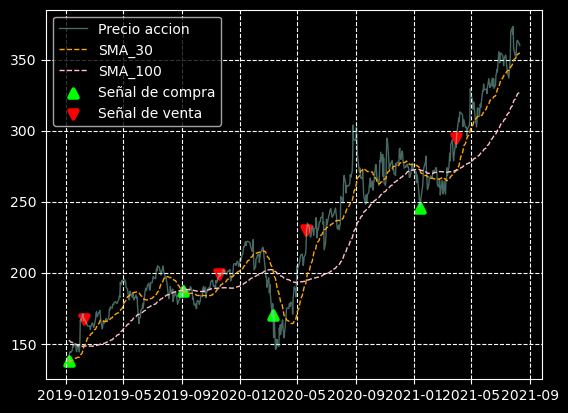

SystemExit: 0

C:\ProgramData\Anaconda3\envs\cHAT_BOT\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [38]:
assistant=GenericAssistant('palabras.json',intent_methods=mappings)
assistant.train_model()

while True:
    try:
        with speech_recognition.Microphone() as mic:
            recognizer.adjust_for_ambient_noise(mic,duration=0.2)
            audio=recognizer.listen(mic)
            message=recognizer.recognize_google(audio,language="es-CO")
            message=message.lower()
        assistant.request(message)
    except speech_recognition.UnknownValueError:
        recognizer=speech_recognition.Recognizer()